In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import math


In [2]:
tickers = ["BHEL.NS", "THERMAX.NS", "AIAENG.NS", "TRIVENI.NS", "KIRLOSBROS.NS"]

In [3]:
data = yf.download(tickers, start="2015-01-01", end="2023-10-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


In [4]:
data = data.ffill()

In [5]:
print(data.head())

Price             Close                                                    \
Ticker        AIAENG.NS     BHEL.NS KIRLOSBROS.NS   THERMAX.NS TRIVENI.NS   
Date                                                                        
2015-01-01  1018.567261  160.128403    219.818008  1004.369385  21.753733   
2015-01-02  1036.164429  164.153244    218.752075   990.873352  22.588629   
2015-01-05  1040.329590  163.020355    220.837616   978.887268  23.330765   
2015-01-06  1001.063843  155.596771    215.368835   960.200500  21.475431   
2015-01-07   985.245422  151.363235    218.891083   976.952576  21.985649   

Price              High                                                    \
Ticker        AIAENG.NS     BHEL.NS KIRLOSBROS.NS   THERMAX.NS TRIVENI.NS   
Date                                                                        
2015-01-01  1038.972349  160.963168    223.015878  1017.393579  22.032031   
2015-01-02  1054.697497  165.137082    225.147787  1013.052153  24.119275  

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [7]:
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i])
        y.append(data[i, 0])  # Predict the first stock (BHEL)
    return np.array(X), np.array(y)


In [8]:
time_step = 60
X, y = create_sequences(scaled_data, time_step)

In [9]:
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

In [10]:
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

In [11]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\TANISHKA SHARMA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [13]:
model.fit(X, y, batch_size=32, epochs=20)


Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - loss: 0.0114
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 8.0342e-04
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 6.4804e-04
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 5.5159e-04
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 4.3005e-04
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 5.1363e-04
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 5.2593e-04
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 4.4145e-04
Epoch 9/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 4.1135e-04
Epoch 10/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 3.7292e-04
Epoch 11/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 4.4749e-04
Epoch 12/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 4.6420e-04
Epoch 13/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 3.3745e-04
Epoch 14/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 3.8825e-04
Epoch 15/20
66/66 

In [14]:
train_predict = model.predict(X)

66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step


In [17]:

train_predict = model.predict(X)


train_predict = train_predict.reshape(-1, 1)


train_predict = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((len(train_predict), data.shape[1]-1))), axis=1))[:, 0]


y = y.reshape(-1, 1)


y_actual = scaler.inverse_transform(np.concatenate((y, np.zeros((len(y), data.shape[1]-1))), axis=1))[:, 0]

66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


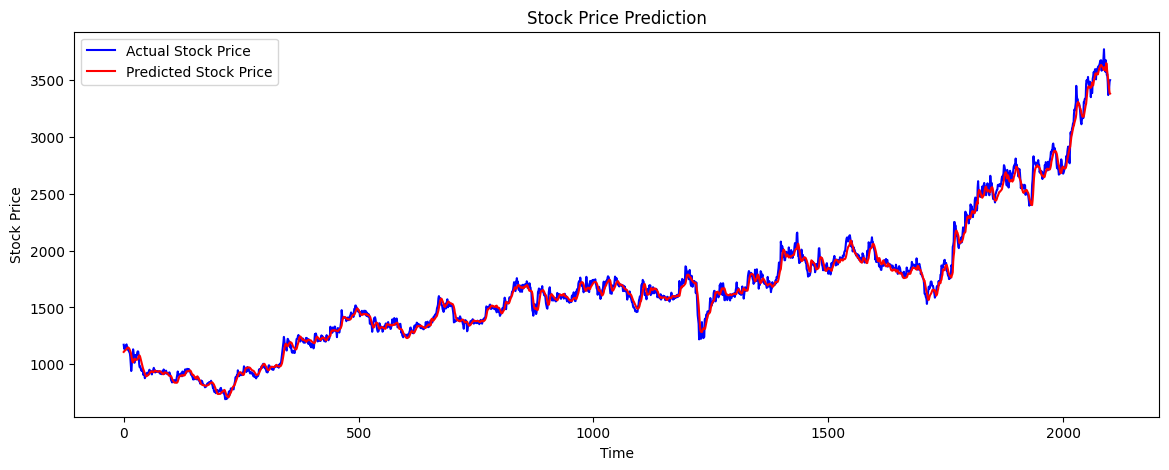

In [18]:
plt.figure(figsize=(14, 5))
plt.plot(y_actual, color="blue", label="Actual Stock Price")
plt.plot(train_predict, color="red", label="Predicted Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [19]:
rmse = math.sqrt(mean_squared_error(y_actual, train_predict))
print(f"RMSE: {rmse}")

RMSE: 49.09798092327601


In [20]:
last_sequence = X[-1].reshape(1, X.shape[1], X.shape[2])  # Reshape for LSTM input


single_prediction = model.predict(last_sequence)


single_prediction = single_prediction.reshape(-1, 1)


single_prediction = scaler.inverse_transform(np.concatenate((single_prediction, np.zeros((len(single_prediction), data.shape[1]-1))), axis=1))[:, 0]


actual_value = scaler.inverse_transform(np.concatenate((y[-1].reshape(-1, 1), np.zeros((1, data.shape[1]-1))), axis=1))[:, 0]


print(f"Predicted Value: {single_prediction[0]}")
print(f"Actual Value: {actual_value[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Value: 3382.002412894392
Actual Value: 3500.470947265625


In [22]:
import ta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import math
import ta

In [24]:
def add_technical_indicators(df):
   
    df['MACD'] = ta.trend.macd_diff(df)
    
   
    df['RSI'] = ta.momentum.rsi(df)
    
    df['MA_50'] = ta.trend.sma_indicator(df, window=50)
    df['MA_200'] = ta.trend.sma_indicator(df, window=200)
    
   
    bollinger = ta.volatility.BollingerBands(df)
    df['Bollinger_High'] = bollinger.bollinger_hband()
    df['Bollinger_Low'] = bollinger.bollinger_lband()
    
  
    df = df.ffill()
    return df


for ticker in tickers:
    data[ticker] = add_technical_indicators(data[ticker])


print(data.head())



scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i])
        y.append(data[i]) 
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(scaled_data, time_step)


X = X.reshape(X.shape[0], X.shape[1], X.shape[2])


model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(data.shape[1]))  


model.compile(optimizer="adam", loss="mean_squared_error")


model.fit(X, y, batch_size=32, epochs=20)


train_predict = model.predict(X)


train_predict = scaler.inverse_transform(train_predict)


y_actual = scaler.inverse_transform(y)


plt.figure(figsize=(14, 8))
for i, ticker in enumerate(tickers):
    plt.plot(y_actual[:, i], label=f"Actual {ticker}")
    plt.plot(train_predict[:, i], label=f"Predicted {ticker}")

plt.title("Stock Price Predictions for All 5 Stocks")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


for i, ticker in enumerate(tickers):
    rmse = math.sqrt(mean_squared_error(y_actual[:, i], train_predict[:, i]))
    print(f"RMSE for {ticker}: {rmse}")

KeyError: 'BHEL.NS'